# 데이터 불러오기

In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_excel("C:\Data_Engineer_Study\멀캠_PJT_2\multi_finalproject\data\Mapping_data\전체데이터관리.xlsx", sheet_name = "개발 채용 예측")

In [106]:
df

,년/월,시도,산업_대분류,구인인원,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수
0,201301,서울,제조업,60,0,30219,97,10195064,1562.7,2.75,99.14964,101.0
1,201301,서울,도매 및 소매업,104,0,109382,202,10195064,1562.7,2.75,99.14964,101.0
2,201301,서울,정보통신업,763,4,23384,1230,10195064,1562.7,2.75,99.14964,101.0
3,201301,서울,"전문, 과학 및 기술 서비스업",35,1,33649,70,10195064,1562.7,2.75,99.14964,101.0
4,201301,서울,"사업시설 관리, 사업 지원 및 임대 서비스업",64,0,11578,62,10195064,1562.7,2.75,99.14964,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,202212,제주,제조업,0,0,2134,2,678159,1968.8,3.25,98.75089,90.2
10196,202212,제주,도매 및 소매업,0,0,7385,6,678159,1968.8,3.25,98.75089,90.2
10197,202212,제주,정보통신업,8,0,559,23,678159,1968.8,3.25,98.75089,90.2
10198,202212,제주,"전문, 과학 및 기술 서비스업",1,0,1561,4,678159,1968.8,3.25,98.75089,90.2


In [107]:
df.columns

Index(['년/월', '시도', '산업_대분류', '구인인원', '취업건수', '사업체 수', '실업급여 수급자 수',
       '각 지역별 인구', 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수'],
      dtype='object')

---

# 연도, 월별 피쳐값의 주기성 확인

In [108]:
# 연도, 월 분리하여 새로운 데이터 프레임 생성

df_new = df
df_new[['년도', '월']] = df_new['년/월'].astype(str).str.extract(r'(\d{4})(\d{2})')
df_new = df_new.drop(columns = '년/월')
df_new

,시도,산업_대분류,구인인원,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수,년도,월
0,서울,제조업,60,0,30219,97,10195064,1562.7,2.75,99.14964,101.0,2013,01
1,서울,도매 및 소매업,104,0,109382,202,10195064,1562.7,2.75,99.14964,101.0,2013,01
2,서울,정보통신업,763,4,23384,1230,10195064,1562.7,2.75,99.14964,101.0,2013,01
3,서울,"전문, 과학 및 기술 서비스업",35,1,33649,70,10195064,1562.7,2.75,99.14964,101.0,2013,01
4,서울,"사업시설 관리, 사업 지원 및 임대 서비스업",64,0,11578,62,10195064,1562.7,2.75,99.14964,101.0,2013,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,제주,제조업,0,0,2134,2,678159,1968.8,3.25,98.75089,90.2,2022,12
10196,제주,도매 및 소매업,0,0,7385,6,678159,1968.8,3.25,98.75089,90.2,2022,12
10197,제주,정보통신업,8,0,559,23,678159,1968.8,3.25,98.75089,90.2,2022,12
10198,제주,"전문, 과학 및 기술 서비스업",1,0,1561,4,678159,1968.8,3.25,98.75089,90.2,2022,12


In [109]:
df_new.columns

Index(['시도', '산업_대분류', '구인인원', '취업건수', '사업체 수', '실업급여 수급자 수', '각 지역별 인구',
       'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수', '년도', '월'],
      dtype='object')

In [110]:
df_group = df_new.drop(columns = ['시도', '각 지역별 인구', 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수'])
df_group = df_group.groupby(['년도', '산업_대분류']).agg('mean').reset_index()

In [111]:
df_MF = df_group[df_group['산업_대분류'] == '제조업']
df_DS = df_group[df_group['산업_대분류'] == '도매 및 소매업']
df_IT = df_group[df_group['산업_대분류'] == '정보통신업']
df_SC = df_group[df_group['산업_대분류'] == '전문, 과학 및 기술 서비스업']
df_SS = df_group[df_group['산업_대분류'] == '사업시설 관리, 사업 지원 및 임대 서비스업']

In [112]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path ='C:/Windows/Fonts/Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font_name)

In [113]:
df_group['구인인원']

0     11.794118
1      9.019608
2      4.181373
3     75.583333
4     20.205882
5     10.205882
6      7.098039
7      4.024510
8     65.377451
9     15.911765
10     9.362745
11     0.000000
12     4.995098
13    54.519608
14    15.558824
15     9.024510
16     0.000000
17     5.093137
18    54.098039
19    15.049020
20     8.264706
21     1.926471
22     5.735294
23    50.171569
24    17.529412
25     6.303922
26     2.019608
27     5.024510
28    40.877451
29    12.950980
30     6.426471
31     1.754902
32     5.093137
33    45.225490
34    13.098039
35     6.852941
36     2.161765
37     5.867647
38    47.573529
39    16.867647
40    10.294118
41     2.955882
42     8.975490
43    72.323529
44    20.691176
45     8.990196
46     2.132353
47     6.857843
48    84.004902
49    20.666667
Name: 구인인원, dtype: float64

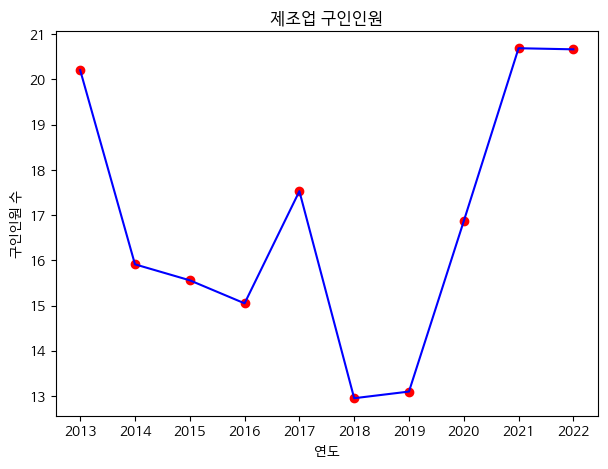

In [114]:
# 연도별 구인인원 수(평균)
x = df_MF['년도']
y = df_MF['구인인원']
plt.figure(figsize=(7,5))  
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue')
plt.title('제조업 구인인원')
plt.xlabel('연도')
plt.ylabel('구인인원 수')

plt.show()

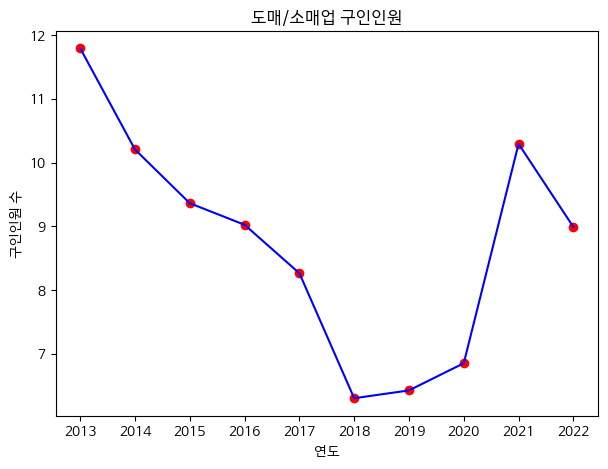

In [115]:
# 연도별 구인인원 수(평균)
x = df_DS['년도']
y = df_DS['구인인원']
plt.figure(figsize=(7,5))  
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue')
plt.title('도매/소매업 구인인원')
plt.xlabel('연도')
plt.ylabel('구인인원 수')

plt.show()

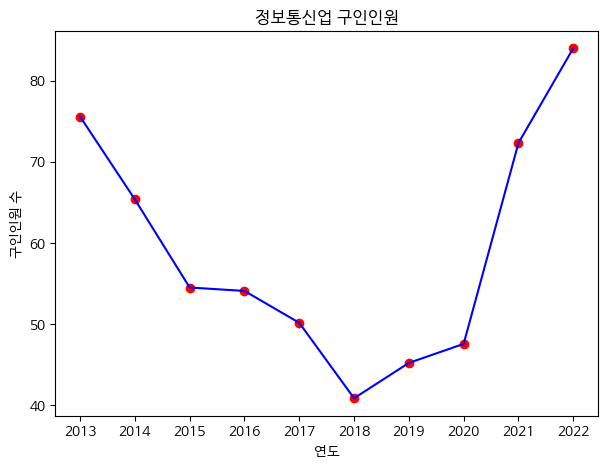

In [116]:
# 연도별 구인인원 수(평균)
x = df_IT['년도']
y = df_IT['구인인원']
plt.figure(figsize=(7,5))  
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue')
plt.title('정보통신업 구인인원')
plt.xlabel('연도')
plt.ylabel('구인인원 수')

plt.show()

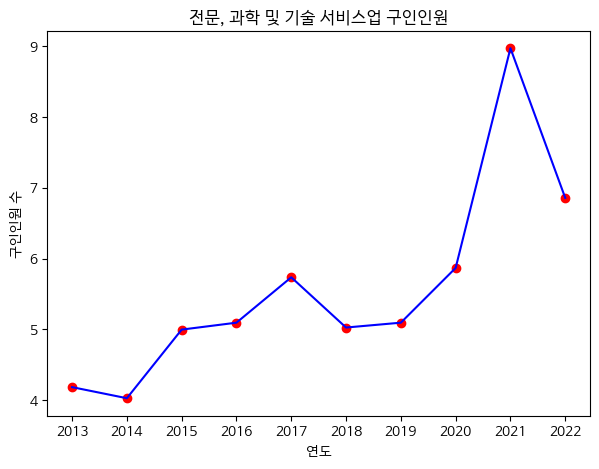

In [117]:
# 연도별 구인인원 수(평균)
x = df_SC['년도']
y = df_SC['구인인원']
plt.figure(figsize=(7,5))  
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue')
plt.title('전문, 과학 및 기술 서비스업 구인인원')
plt.xlabel('연도')
plt.ylabel('구인인원 수')

plt.show()

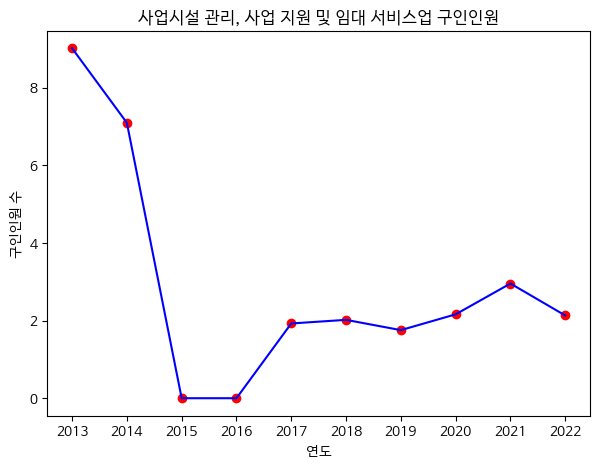

In [118]:
# 연도별 구인인원 수(평균)
x = df_SS['년도']
y = df_SS['구인인원']
plt.figure(figsize=(7,5))  
plt.scatter(x, y, color = 'red')
plt.plot(x, y, color = 'blue')
plt.title('사업시설 관리, 사업 지원 및 임대 서비스업 구인인원')
plt.xlabel('연도')
plt.ylabel('구인인원 수')

plt.show()

---

# 예측 모델 함수 생성

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle


# 평가지표 함수 생성
# R2_score / MAE / MSE / RMSLE 
def get_scores_f(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain)   # train
    pred2 = model.predict(xtest)    # test

    # 음수가 있어도 상관없음
    A1 = r2_score(ytrain, pred1)
    A2 = r2_score(ytest, pred2)


    B = mae(ytest, pred2)
    C = mse(ytest, pred2)
    # msle, rmsle 는 음수가 있어서는 안됨
    pred2 = np.where(pred2<0, 0, pred2) # pred2값이 0보다 작은경우 0으로 대체, 아닌경우 그대로 pred2값..
    D = msle(ytest, pred2)
    E = np.sqrt(D)   # rmsle
    data = [round(x, 4) for x in [A1, A2, B, C, E]]
    names = 'r2_train r2_test mae mse rmsle'.split()
    scores = pd.Series(data, index=names)
    return  scores

# 예측모델 생성 함수 
# 선형회귀, 의사결정트리, 랜덤포레스트, XGB
def make_models_f(xtrain, xtest, ytrain, ytest, n=300):
    temp = pd.DataFrame()

    # 선형회귀 
    model1 = LinearRegression().fit(xtrain, ytrain)
    temp['LinearRegression'] = get_scores_f(model1, xtrain, xtest, ytrain, ytest)

    # 의사결정트리
    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain, ytrain)  
    temp['DecisionTree'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model2 = DecisionTreeRegressor(max_depth=d, random_state=0).fit(xtrain, ytrain)
        temp[f'DecisionTree_{d}'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    # 랜덤포레스트 
    model3 = RandomForestRegressor(n, random_state=0).fit(xtrain, ytrain)
    temp['RandomForest'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model3 = RandomForestRegressor(n, max_depth=d, random_state=0).fit(xtrain, ytrain)
        temp[f'RandomForest_{d}'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    # XGB
    model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    temp['XGB'] = get_scores_f(model4, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp

---

# Try 1
- '년/월' 제외
- '시도', '산업대분류' 컬럼 -> 원핫인코딩
- 그 외 MinMaxScaler 적용

In [120]:
# target 데이터인 '구인인원' 제외
# '년/월'의 경우 영향x -> 제외
df_X = df[['시도', '산업_대분류', '취업건수', '사업체 수', '실업급여 수급자 수',
       '각 지역별 인구', 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수']].values

# 타겟 데이터
df_Y = df[['구인인원']].values

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [122]:
df_X

array([['서울', '제조업', 0, ..., 2.75, 99.14964, 101.0],
       ['서울', '도매 및 소매업', 0, ..., 2.75, 99.14964, 101.0],
       ['서울', '정보통신업', 4, ..., 2.75, 99.14964, 101.0],
       ...,
       ['제주', '정보통신업', 0, ..., 3.25, 98.75089, 90.2],
       ['제주', '전문, 과학 및 기술 서비스업', 0, ..., 3.25, 98.75089, 90.2],
       ['제주', '사업시설 관리, 사업 지원 및 임대 서비스업', 0, ..., 3.25, 98.75089, 90.2]],
      dtype=object)

In [123]:
# '시도' -> 원핫인코딩 실시

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
df_X = np.array(ct.fit_transform(df_X))

In [124]:
# '산업_대분류' -> 원핫인코딩 실시

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
df_X = np.array(ct.fit_transform(df_X))

In [125]:
df_X[0]

array([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 30219, 97,
       10195064, 1562.7, 2.75, 99.14964, 101.0], dtype=object)

In [126]:
# 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수'.... -> 정규화 실시(값 범위 0~1)
scaler = MinMaxScaler()
dfX_scale = scaler.fit_transform(df_X)
dfX_scale

array([[0.        , 0.        , 0.        , ..., 0.81818182, 0.13274057,
        0.71576227],
       [1.        , 0.        , 0.        , ..., 0.81818182, 0.13274057,
        0.71576227],
       [0.        , 0.        , 0.        , ..., 0.81818182, 0.13274057,
        0.71576227],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.04024227,
        0.43669251],
       [0.        , 0.        , 1.        , ..., 1.        , 0.04024227,
        0.43669251],
       [0.        , 1.        , 0.        , ..., 1.        , 0.04024227,
        0.43669251]])

- 훈련용 Xtrain(독립변수), Ytrain(종속변수) 분리

In [127]:
x_train, x_test, y_train, y_test = train_test_split(dfX_scale, df_Y,
                                                    test_size = 0.3,
                                                    random_state = 1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(7140, 30), (3060, 30), (7140, 1), (3060, 1)]


In [128]:
models = make_models_f(x_train, x_test, y_train, y_test)

c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

In [129]:
print(models.sort_values('mse').head(10))

                r2_train  r2_test    diff     mae       mse   rmsle
RandomForest      0.9898   0.9367  0.0531  5.4895  201.1877  0.6213
RandomForest_7    0.9683   0.9354  0.0329  5.9939  205.1169  0.7646
RandomForest_8    0.9748   0.9352  0.0396  5.8126  205.9944  0.7280
RandomForest_6    0.9590   0.9330  0.0260  6.3329  212.9348  0.8197
XGB               0.9964   0.9305  0.0659  5.8767  220.8897  0.6634
RandomForest_5    0.9467   0.9289  0.0178  6.8524  225.8064  0.8991
DecisionTree_6    0.9504   0.9277  0.0227  6.5316  229.7561  0.8023
RandomForest_4    0.9312   0.9229  0.0083  7.5612  244.8220  0.9970
DecisionTree_8    0.9693   0.9221  0.0472  6.2710  247.4830  0.7450
DecisionTree_7    0.9603   0.9201  0.0402  6.5441  253.9213  0.7792


---

# Try 2.
- 년/월 컬럼 추가
- 연도, 월 분리
    - 연도 : MinMaxScaling
    - 월 : 원핫 인코딩
- 학습데이터로 학습 후 22년 데이터 예측하여 비교
    - 학습용 : 13~21년
    - 검증 : 22년 데이터

In [130]:
# 정규표현식 활용, 년/월 컬럼에서 연도, 월 분리하여 컬럼 생성

df[['년도', '월']] = df['년/월'].astype(str).str.extract(r'(\d{4})(\d{2})')
df = df.drop(columns = '년/월')
df

,시도,산업_대분류,구인인원,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수,년도,월
0,서울,제조업,60,0,30219,97,10195064,1562.7,2.75,99.14964,101.0,2013,01
1,서울,도매 및 소매업,104,0,109382,202,10195064,1562.7,2.75,99.14964,101.0,2013,01
2,서울,정보통신업,763,4,23384,1230,10195064,1562.7,2.75,99.14964,101.0,2013,01
3,서울,"전문, 과학 및 기술 서비스업",35,1,33649,70,10195064,1562.7,2.75,99.14964,101.0,2013,01
4,서울,"사업시설 관리, 사업 지원 및 임대 서비스업",64,0,11578,62,10195064,1562.7,2.75,99.14964,101.0,2013,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,제주,제조업,0,0,2134,2,678159,1968.8,3.25,98.75089,90.2,2022,12
10196,제주,도매 및 소매업,0,0,7385,6,678159,1968.8,3.25,98.75089,90.2,2022,12
10197,제주,정보통신업,8,0,559,23,678159,1968.8,3.25,98.75089,90.2,2022,12
10198,제주,"전문, 과학 및 기술 서비스업",1,0,1561,4,678159,1968.8,3.25,98.75089,90.2,2022,12


In [131]:
# 13~21년 / 22년 데이터 분리
# 13~21년 데이터로 학습, 검증 실시
# 22년 데이터에 적용

df_val = df[df['년도'] == '2022'] 
df_test = df[df['년도'] != '2022']

In [132]:
df_testY = df_test['구인인원']
df_testX = df_test.drop(columns = '구인인원')

In [133]:
# '시도', '산업_대분류', '월' 컬럼에 대해 자동으로 원핫 인코딩 실행
# '년도'컬럼의 경우 MinMax스케일링 적용 예정
df_testX = pd.get_dummies(df_testX[['시도', '산업_대분류', '월']], dtype = int)
df_testX

,시도_강원,시도_경기,시도_경남,시도_경북,시도_광주,시도_대구,시도_대전,시도_부산,시도_서울,시도_세종,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
# 데이터 스케일링
scaler = MinMaxScaler()
df_test_sc = scaler.fit_transform(df_testX)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(df_test_sc, df_testY,
                                                    test_size = 0.3,
                                                    random_state = 1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(6426, 34), (2754, 34), (6426,), (2754,)]


In [136]:
models = make_models_f(x_train, x_test, y_train, y_test)

In [137]:
# 13년 ~ 21년 데이터 결과
# mse 기준 상위 10개 모델 선정 

print(models.sort_values('mse').head(10))
# 랜덤포레스트 max_depth 8의 모델로 최종모델 선정

                r2_train  r2_test    diff     mae       mse   rmsle
RandomForest_8    0.8966   0.8512  0.0454  6.8858  391.6068  0.7692
XGB               0.8987   0.8503  0.0484  6.8829  394.1933  0.7473
RandomForest_7    0.8957   0.8502  0.0455  6.9741  394.3721  0.7992
RandomForest      0.8987   0.8501  0.0486  6.9853  394.5071  0.7679
DecisionTree      0.8987   0.8489  0.0498  7.0253  397.7001  0.7725
DecisionTree_8    0.8957   0.8487  0.0470  6.9207  398.1622  0.7642
RandomForest_6    0.8941   0.8474  0.0467  7.1797  401.6973  0.8489
RandomForest_5    0.8912   0.8445  0.0467  7.5133  409.2919  0.9173
DecisionTree_7    0.8945   0.8410  0.0535  7.1331  418.6236  0.8074
DecisionTree_6    0.8926   0.8398  0.0528  7.2837  421.7273  0.8484


In [138]:
# 최종모델 학습
Final_model = RandomForestRegressor(300, max_depth = 8, random_state=0).fit(x_train, y_train)

In [139]:
# 최종 모델에 대한 예측값 생성 및 비교
pred = Final_model.predict(x_test)

In [140]:
# 13~21년 test데이터 -> 구인인원의 실제 값과 예측값 비교
P = pd.DataFrame(pred)
P.columns = ['예측값']

T = pd.DataFrame(y_test).reset_index(drop = True)
T.columns = ['실제값']

compare = pd.concat([T,P], axis = 1)
compare['실제 - 예측'] = abs(compare['실제값'] - compare['예측값'])
compare

,실제값,예측값,실제 - 예측
0,10,10.818167,0.818167
1,2,2.036391,0.036391
2,188,169.143677,18.856323
3,8,2.869525,5.130475
4,4,2.869525,1.130475
...,...,...,...
2749,30,16.172668,13.827332
2750,3,6.480786,3.480786
2751,5,2.036391,2.963609
2752,1,9.955634,8.955634


In [141]:
compare['실제값'].mean()

16.87436456063907

In [142]:
compare['예측값'].mean()

17.75499773579272

In [143]:
compare['실제 - 예측'].mean()

6.8858274757723645

In [144]:
# 22년도 데이터 예측

df_valY = df_val['구인인원']
df_valX = df_val.drop(columns = '구인인원')
df_valX = pd.get_dummies(df_valX[['시도', '산업_대분류', '월']], dtype = int)
df_val_sc = scaler.transform(df_valX) # fit적용은 이미 시켰으니 transform만 실행

In [145]:
pred = Final_model.predict(df_val_sc)
pred

array([ 39.06738921,  58.73113686, 437.38434583, ...,  16.17266816,
         2.03639148,   1.14121681])

In [146]:
# 구인인원의 실제 값과 예측값 비교
P = pd.DataFrame(pred)
P.columns = ['예측값']

T = pd.DataFrame(df_valY).reset_index(drop = True)
T.columns = ['실제값']

compare22 = pd.concat([T,P], axis = 1)
compare22['실제 - 예측'] = abs(compare22['실제값'] - compare22['예측값'])
compare22

,실제값,예측값,실제 - 예측
0,32,39.067389,7.067389
1,50,58.731137,8.731137
2,624,437.384346,186.615654
3,29,31.783117,2.783117
4,4,24.218365,20.218365
...,...,...,...
1015,0,4.605521,4.605521
1016,0,2.869525,2.869525
1017,8,16.172668,8.172668
1018,1,2.036391,1.036391


In [147]:
compare22['실제값'].mean()

24.530392156862746

In [148]:
compare22['예측값'].mean()

18.226996827794377

In [149]:
compare22['실제 - 예측'].mean()

9.782578031864137

---

# Try 3
- 사업시설 관리, 사업지원 및 임대 서비스업 제외 (평균 구인인원이 2.2명, 업종이 굉장히 포괄적..)


In [150]:
df_new = df[df['산업_대분류'] != '사업시설 관리, 사업 지원 및 임대 서비스업']
df_new

,시도,산업_대분류,구인인원,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수,년도,월
0,서울,제조업,60,0,30219,97,10195064,1562.7,2.75,99.14964,101.0,2013,01
1,서울,도매 및 소매업,104,0,109382,202,10195064,1562.7,2.75,99.14964,101.0,2013,01
2,서울,정보통신업,763,4,23384,1230,10195064,1562.7,2.75,99.14964,101.0,2013,01
3,서울,"전문, 과학 및 기술 서비스업",35,1,33649,70,10195064,1562.7,2.75,99.14964,101.0,2013,01
5,부산,제조업,23,0,17983,23,3538191,1562.7,2.75,99.14964,101.0,2013,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193,경남,"전문, 과학 및 기술 서비스업",0,0,5197,20,3280493,1968.8,3.25,98.75089,90.2,2022,12
10195,제주,제조업,0,0,2134,2,678159,1968.8,3.25,98.75089,90.2,2022,12
10196,제주,도매 및 소매업,0,0,7385,6,678159,1968.8,3.25,98.75089,90.2,2022,12
10197,제주,정보통신업,8,0,559,23,678159,1968.8,3.25,98.75089,90.2,2022,12


In [151]:
df_newY = df_new['구인인원']
df_newX = df_new.drop(columns = '구인인원')

In [152]:
df_newX = pd.get_dummies(df_newX[['시도', '산업_대분류', '월']], dtype = int)
df_newX

,시도_강원,시도_경기,시도_경남,시도_경북,시도_광주,시도_대구,시도_대전,시도_부산,시도_서울,시도_세종,...,월_03,월_04,월_05,월_06,월_07,월_08,월_09,월_10,월_11,월_12
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
scaler = MinMaxScaler()
df_newX_sc = scaler.fit_transform(df_newX)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(df_newX_sc, df_newY,
                                                    test_size = 0.3,
                                                    random_state = 1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(5712, 33), (2448, 33), (5712,), (2448,)]


In [155]:
# 예측모델 학습 및 평가지표 생성
models = make_models_f(x_train, x_test, y_train, y_test)

In [156]:
# mse기준 상위 10개 모델 확인
print(models.sort_values('mse').head(10))

# 최종모델 DecisionTree max_depth 4로 선정

                r2_train  r2_test    diff      mae       mse   rmsle
DecisionTree_4    0.8840   0.8350  0.0490   9.6475  769.3551  0.9126
RandomForest_4    0.8899   0.8316  0.0583   9.5839  785.4714  0.9098
RandomForest_5    0.8959   0.8284  0.0675   9.3936  800.1830  0.8654
RandomForest_6    0.9001   0.8250  0.0751   9.1421  815.8558  0.8160
RandomForest_7    0.9023   0.8207  0.0816   9.0645  836.0768  0.7681
DecisionTree_6    0.8965   0.8190  0.0775   9.1825  843.9719  0.8135
RandomForest_8    0.9034   0.8178  0.0856   8.9665  849.6531  0.7300
DecisionTree_7    0.8992   0.8173  0.0819   9.1432  851.9112  0.7733
DecisionTree_5    0.8915   0.8165  0.0750   9.5004  855.8712  0.8670
RandomForest_3    0.8676   0.8146  0.0530  11.3470  864.6996  1.0250


In [157]:
F_model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(x_train, y_train)

In [158]:
pred = F_model.predict(x_test)
pred

array([ 3.40291852,  9.46244131,  9.46244131, ...,  3.40291852,
       20.27768595, 49.09876543])

In [159]:
# 구인인원의 실제 값과 예측값 비교
P = pd.DataFrame(pred)
P.columns = ['예측값']

T = pd.DataFrame(y_test).reset_index(drop = True)
T.columns = ['실제값']

compare_new = pd.concat([T,P], axis = 1)
compare_new['실제 - 예측'] = abs(compare_new['실제값'] - compare_new['예측값'])
compare_new

,실제값,예측값,실제 - 예측
0,4,3.402919,0.597081
1,21,9.462441,11.537559
2,16,9.462441,6.537559
3,9,3.402919,5.597081
4,21,9.462441,11.537559
...,...,...,...
2443,10,9.462441,0.537559
2444,7,3.402919,3.597081
2445,7,3.402919,3.597081
2446,18,20.277686,2.277686


In [160]:
compare_new['실제 - 예측'].mean()

9.647501060323261

In [161]:
compare_new['실제값'].mean()

21.717728758169933

In [162]:
compare_new['예측값'].mean()

21.80852669397974

---

# Try 4.
- 경제지표로만 예측

In [163]:
df

,시도,산업_대분류,구인인원,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수,년도,월
0,서울,제조업,60,0,30219,97,10195064,1562.7,2.75,99.14964,101.0,2013,01
1,서울,도매 및 소매업,104,0,109382,202,10195064,1562.7,2.75,99.14964,101.0,2013,01
2,서울,정보통신업,763,4,23384,1230,10195064,1562.7,2.75,99.14964,101.0,2013,01
3,서울,"전문, 과학 및 기술 서비스업",35,1,33649,70,10195064,1562.7,2.75,99.14964,101.0,2013,01
4,서울,"사업시설 관리, 사업 지원 및 임대 서비스업",64,0,11578,62,10195064,1562.7,2.75,99.14964,101.0,2013,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,제주,제조업,0,0,2134,2,678159,1968.8,3.25,98.75089,90.2,2022,12
10196,제주,도매 및 소매업,0,0,7385,6,678159,1968.8,3.25,98.75089,90.2,2022,12
10197,제주,정보통신업,8,0,559,23,678159,1968.8,3.25,98.75089,90.2,2022,12
10198,제주,"전문, 과학 및 기술 서비스업",1,0,1561,4,678159,1968.8,3.25,98.75089,90.2,2022,12


---

# (아래 코드는 제외)

- 일부 업종(농업..)의 경우 구인, 구직, 취업인원의 대부분이 0으로 되어있어 업종 제외 필요성..

In [156]:
job = pd.DataFrame()
for i in df['산업_대분류'].unique():
    job[i] = round(df[df['산업_대분류'] == f'{i}'][['구인인원', '구직건수', '취업건수']].mean(),2)

In [157]:
# 구인인원 기준 공공행정까지 컷해서 다시 머신러닝 돌리기
cut = job.T['구인인원'].sort_values(ascending = False)
cut

정보통신업                               58.00
제조업                                 16.85
도매 및 소매업                             7.77
전문, 과학 및 기술 서비스업                     6.36
사업시설 관리, 사업 지원 및 임대 서비스업             2.20
건설업                                  2.11
운수 및 창고업                             0.96
협회 및 단체, 수리 및 기타 개인 서비스업             0.63
보건업 및 사회복지 서비스업                      0.50
금융 및 보험업                             0.45
공공행정, 국방 및 사회보장 행정                   0.25
농업, 임업 및 어업                          0.24
부동산업                                 0.14
숙박 및 음식점업                            0.14
전기, 가스, 증기 및 공기조절 공급업                0.12
수도, 하수 및 폐기물 처리, 원료 재생업              0.05
국제 및 외국기관                            0.01
광업                                   0.00
교육서비스업                               0.00
예술, 스포츠 및 여가 관련 서비스업                 0.00
가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동     0.00
분류불능                                 0.00
해당없음                                 0.00
Name: 구인인원, dtype: float64

In [158]:
cut.index

Index(['정보통신업', '제조업', '도매 및 소매업', '전문, 과학 및 기술 서비스업',
       '사업시설 관리, 사업 지원 및 임대 서비스업', '건설업', '운수 및 창고업',
       '협회 및 단체, 수리 및 기타 개인 서비스업', '보건업 및 사회복지 서비스업', '금융 및 보험업',
       '공공행정, 국방 및 사회보장 행정', '농업, 임업 및 어업', '부동산업', '숙박 및 음식점업',
       '전기, 가스, 증기 및 공기조절 공급업', '수도, 하수 및 폐기물 처리, 원료 재생업', '국제 및 외국기관', '광업',
       '교육서비스업', '예술, 스포츠 및 여가 관련 서비스업', '가구 내 고용활동 및 달리 분류되지 않은 자가소비 생산활동',
       '분류불능', '해당없음'],
      dtype='object')

In [159]:
cut_idx = ['정보통신업', '제조업', '도매 및 소매업', '전문, 과학 및 기술 서비스업',
       '사업시설 관리, 사업 지원 및 임대 서비스업', '건설업', '운수 및 창고업',
       '협회 및 단체, 수리 및 기타 개인 서비스업', '보건업 및 사회복지 서비스업', '금융 및 보험업',
       '공공행정, 국방 및 사회보장 행정']

---

# 1. cut_idx기준 머신러닝 실행

In [286]:
df_cut = df[df['산업_대분류'].isin(cut_idx)]
df_cut

,년/월,시도,산업_대분류,구인인원,구직건수,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수
2,201801,서울,제조업,33,0,1,32866,0,9851767,1812.0,1.50,100.37300,110.7
5,201801,서울,건설업,6,0,0,53694,0,9851767,1812.0,1.50,100.37300,110.7
6,201801,서울,도매 및 소매업,38,0,0,125584,0,9851767,1812.0,1.50,100.37300,110.7
7,201801,서울,운수 및 창고업,1,0,0,7956,0,9851767,1812.0,1.50,100.37300,110.7
9,201801,서울,정보통신업,303,0,9,26974,0,9851767,1812.0,1.50,100.37300,110.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23449,202212,제주,"전문, 과학 및 기술 서비스업",1,0,0,1561,3,678159,1968.8,3.25,98.75089,90.2
23450,202212,제주,"사업시설 관리, 사업 지원 및 임대 서비스업",0,0,0,1448,8,678159,1968.8,3.25,98.75089,90.2
23451,202212,제주,"공공행정, 국방 및 사회보장 행정",0,0,0,126,0,678159,1968.8,3.25,98.75089,90.2
23453,202212,제주,보건업 및 사회복지 서비스업,0,0,0,2066,0,678159,1968.8,3.25,98.75089,90.2


In [288]:
cut_X = df_cut[['시도', '산업_대분류', '취업건수', '사업체 수', '실업급여 수급자 수',
       '각 지역별 인구', 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수']].values

cut_Y = df_cut[['구인인원']].values

In [289]:
# 시도 인코딩
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
cut_X = np.array(ct.fit_transform(cut_X))
cut_X

# 산업대분류 인코딩
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
cut_X = np.array(ct.fit_transform(cut_X))
cut_X

array([[0.0, 0.0, 0.0, ..., 1.5, 100.373, 110.7],
       [1.0, 0.0, 0.0, ..., 1.5, 100.373, 110.7],
       [0.0, 0.0, 0.0, ..., 1.5, 100.373, 110.7],
       ...,
       [0.0, 1.0, 0.0, ..., 3.25, 98.75089, 90.2],
       [0.0, 0.0, 0.0, ..., 3.25, 98.75089, 90.2],
       [0.0, 0.0, 0.0, ..., 3.25, 98.75089, 90.2]], dtype=object)

In [290]:
# 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수'.... -> 정규화 실시(값 범위 0~1)
scaler = MinMaxScaler()
cut_X_scale = scaler.fit_transform(cut_X)
cut_X_scale

array([[0.        , 0.        , 0.        , ..., 0.36363636, 0.4165242 ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.36363636, 0.4165242 ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.36363636, 0.4165242 ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 0.04024227,
        0.45187166],
       [0.        , 0.        , 0.        , ..., 1.        , 0.04024227,
        0.45187166],
       [0.        , 0.        , 0.        , ..., 1.        , 0.04024227,
        0.45187166]])

In [291]:
len(cut_Y)

11220

In [292]:
x_train, x_test, y_train, y_test = train_test_split(cut_X_scale, cut_Y,
                                                    test_size = 0.3,
                                                    random_state = 1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(7854, 36), (3366, 36), (7854, 1), (3366, 1)]


In [293]:
models = make_models_f(x_train, x_test, y_train, y_test)

c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

In [294]:
print(models.sort_values('rmsle').head(10))

          r2_train  r2_test    diff     mae       mse   rmsle
model3      0.9842   0.9222  0.0620  3.3147  209.9730  1.8206
model4      0.9974   0.9034  0.0940  3.5423  260.5799  1.8821
model3_8    0.9706   0.9216  0.0490  3.7571  211.4351  1.9383
model3_7    0.9660   0.9201  0.0459  3.9963  215.5725  1.9991
model2      1.0000   0.8658  0.1342  4.1771  362.1153  2.0438
model3_6    0.9590   0.9179  0.0411  4.3754  221.6488  2.0917
model2_8    0.9762   0.8707  0.1055  4.4992  348.7754  2.1211
model2_7    0.9701   0.8670  0.1031  4.7612  358.8764  2.1820
model3_5    0.9434   0.9160  0.0274  4.9286  226.7232  2.2200
model2_6    0.9552   0.8520  0.1032  5.5870  399.2611  2.3637


---

# 2. 가장 많은 정보통신업만 가지고 실행

In [160]:
df_it = df[df['산업_대분류'] == '정보통신업']
df_it

,년/월,시도,산업_대분류,구인인원,구직건수,취업건수,사업체 수,실업급여 수급자 수,각 지역별 인구,GDP(실질),금리,CLI 지수,소비자 심리지수
9,201801,서울,정보통신업,303,0,9,26974,0,9851767,1812.0,1.50,100.37300,110.7
32,201801,부산,정보통신업,22,0,1,1589,0,3467055,1812.0,1.50,100.37300,110.7
55,201801,대구,정보통신업,25,0,0,1168,0,2474309,1812.0,1.50,100.37300,110.7
78,201801,인천,정보통신업,6,0,1,1057,0,2950771,1812.0,1.50,100.37300,110.7
101,201801,광주,정보통신업,23,0,0,737,0,1464037,1812.0,1.50,100.37300,110.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,202212,전북,정보통신업,30,0,0,872,40,1769607,1968.8,3.25,98.75089,90.2
23377,202212,전남,정보통신업,31,0,0,714,18,1817697,1968.8,3.25,98.75089,90.2
23400,202212,경북,정보통신업,15,0,0,973,39,2600492,1968.8,3.25,98.75089,90.2
23423,202212,경남,정보통신업,22,0,2,1092,60,3280493,1968.8,3.25,98.75089,90.2


In [162]:
# target 데이터인 '구인인원' 제외
# '구직건수'의 경우 모든 값이 0 -> 제외 
# '년/월'의 경우 영향x -> 제외
# '정보통신업'만 있으므로 산업 대분류는 제외
X = df_it[['시도', '취업건수', '사업체 수', '실업급여 수급자 수',
       '각 지역별 인구', 'GDP(실질)', '금리', 'CLI 지수', '소비자 심리지수']]

# 타겟 데이터
Y = df_it[['구인인원']]

In [168]:
# test 데이터셋
# '시도' -> 원핫인코딩 실시

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# 정규화 실시(값 범위 0~1)
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

X_scale

array([[0.        , 1.        , 0.        , ..., 0.8       , 0.4165242 ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.8       , 0.4165242 ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.8       , 0.4165242 ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.2       , 0.60954698,
        0.9171123 ],
       [0.        , 1.        , 0.        , ..., 0.2       , 0.60954698,
        0.9171123 ],
       [0.        , 1.        , 0.        , ..., 0.4       , 0.55816548,
        0.81818182]])

In [170]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y,
                                                    test_size = 0.3,
                                                    random_state = 1)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(560, 27), (240, 27), (560, 1), (240, 1)]


In [171]:
models = make_models_f(x_train, x_test, y_train, y_test)

c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimato

In [172]:
print(models.sort_values('rmsle').head(10))

          r2_train  r2_test    diff      mae        mse   rmsle
model1      0.9212   0.9365  0.0153  14.5240  1111.5318  3.8110
model3_7    0.9803   0.9308  0.0495  15.7688  1211.3762  3.9710
model3_8    0.9813   0.9287  0.0526  15.7946  1247.6390  3.9742
model3      0.9833   0.9287  0.0546  15.8462  1247.3950  3.9807
model3_6    0.9785   0.9268  0.0517  16.0375  1280.5932  4.0047
model3_5    0.9748   0.9262  0.0486  16.3004  1291.3638  4.0374
model3_4    0.9634   0.9267  0.0367  16.4851  1282.4562  4.0602
model2_8    0.9956   0.8898  0.1058  17.0126  1928.3562  4.1246
model2_5    0.9816   0.8868  0.0948  17.1567  1982.0718  4.1421
model3_3    0.9476   0.9191  0.0285  17.2937  1416.4630  4.1586


In [173]:
# 2번쨰로 성능이 좋은 랜덤포레스트 확인
model3 = RandomForestRegressor(300, max_depth = 7, random_state=0).fit(x_train, y_train)
get_scores_f(model3, x_train, x_test, y_train, y_test)

c:\Python38\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r2_train       0.9803
r2_test        0.9308
mae           15.7688
mse         1211.3762
rmsle          3.9710
dtype: float64

In [222]:
pred = model3.predict(x_train)
pred = pd.DataFrame(pred).reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
# train 예측값 
train_pred = pd.concat([y_train, pred], axis = 1)
train_pred

,구인인원,0
0,9,13.265110
1,35,27.519625
2,193,256.465858
3,21,23.125496
4,31,24.545655
...,...,...
555,50,50.599990
556,47,31.706984
557,4,14.193715
558,17,17.151566


In [225]:
train_pred['diff'] = abs(train_pred['구인인원'] - train_pred[0])

In [227]:
train_pred['diff'].mean()

8.158240642013217

In [228]:
pred = model3.predict(x_test)
pred = pd.DataFrame(pred).reset_index(drop = True)
y_test = y_test.reset_index(drop = True)
# test 예측값 
test_pred = pd.concat([y_test, pred], axis = 1)

test_pred['diff'] = abs(test_pred['구인인원'] - test_pred[0])
test_pred['diff'].mean()

15.768848975342822